Prompt 1: 

I am analyzing inventory at a retail chain. My data consists of a product ID, category, stock level, last restock date, sales in the last 30 days, supplier lead time, and unit cost. I want to generate python code that calculates inventory turnover rates, identified slow moving items, predicts potential stockouts and create visualizations of all of the above using matplotlib and seaborn. import the necessary modules.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Sample placeholder: Load your inventory DataFrame here
# Columns expected: ['product_id', 'category', 'stock_level', 'last_restock_date', 'sales_30d', 'lead_time_days', 'unit_cost']
# df = pd.read_csv('inventory_data.csv')

# Ensure correct data types
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

# 1. Calculate Inventory Turnover Rate
df['inventory_turnover'] = df['sales_30d'] / df['stock_level'].replace(0, np.nan)

# 2. Identify Slow Moving Items (threshold: turnover < 0.5 or customizable)
slow_moving = df[df['inventory_turnover'] < 0.5]

# 3. Predict Potential Stockouts
# Estimate how many days current stock will last
df['days_until_stockout'] = df['stock_level'] / (df['sales_30d'] / 30).replace(0, np.nan)
df['stockout_risk'] = df['days_until_stockout'] < df['lead_time_days']

# 4. Visualizations

# a. Inventory Turnover Distribution
plt.figure()
sns.histplot(df['inventory_turnover'].dropna(), bins=30, kde=True)
plt.title('Inventory Turnover Rate Distribution')
plt.xlabel('Turnover Rate')
plt.ylabel('Count')
plt.show()

# b. Slow Moving Items by Category
plt.figure()
sns.countplot(data=slow_moving, x='category', order=slow_moving['category'].value_counts().index)
plt.title('Slow Moving Items by Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Items')
plt.show()

# c. Stockout Risk
plt.figure()
sns.barplot(data=df, x='category', y='stockout_risk', estimator=np.mean)
plt.title('Stockout Risk by Category (Proportion)')
plt.ylabel('Proportion at Risk')
plt.xticks(rotation=45)
plt.show()

# d. Days Until Stockout vs. Lead Time
plt.figure()
sns.scatterplot(data=df, x='lead_time_days', y='days_until_stockout', hue='stockout_risk')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Stockout Threshold')
plt.title('Days Until Stockout vs. Supplier Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Days Until Stockout')
plt.legend()
plt.show()

NameError: name 'df' is not defined

Follow up:

We need to define the dataframe

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a sample inventory DataFrame
data = {
    'product_id': [f'P{i:03}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Beauty', 'Toys'], size=20),
    'stock_level': np.random.randint(0, 200, size=20),
    'last_restock_date': [datetime.now() - timedelta(days=np.random.randint(1, 60)) for _ in range(20)],
    'sales_30d': np.random.randint(0, 100, size=20),
    'lead_time_days': np.random.randint(3, 15, size=20),
    'unit_cost': np.round(np.random.uniform(5.0, 150.0, size=20), 2)
}

df = pd.DataFrame(data)

Follow up: 

design the code so that it is one function that takes in a dataframe using the format from the created sample, and calculates and returns inventory turnover, identifies slow-moving items, predicts potential stockouts and generates visualizations using matplotlib and seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

def analyze_inventory(df, slow_turnover_threshold=0.5):
    """
    Analyze inventory data: turnover rate, slow-moving items, stockout prediction, and visualizations.

    Parameters:
        df (pd.DataFrame): Inventory data with columns:
            ['product_id', 'category', 'stock_level', 'last_restock_date',
             'sales_30d', 'lead_time_days', 'unit_cost']
        slow_turnover_threshold (float): Turnover threshold below which items are considered slow-moving.

    Returns:
        dict: {
            'inventory_turnover': pd.Series,
            'slow_moving_items': pd.DataFrame,
            'stockout_predictions': pd.DataFrame
        }
    """

    # Ensure correct types
    df = df.copy()
    df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

    # Inventory Turnover
    df['inventory_turnover'] = df['sales_30d'] / df['stock_level'].replace(0, np.nan)

    # Identify slow-moving items
    slow_moving = df[df['inventory_turnover'] < slow_turnover_threshold]

    # Predict stockouts
    df['daily_sales_rate'] = df['sales_30d'] / 30
    df['days_until_stockout'] = df['stock_level'] / df['daily_sales_rate'].replace(0, np.nan)
    df['stockout_risk'] = df['days_until_stockout'] < df['lead_time_days']

    # --- Visualizations ---

    sns.set(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)

    # Inventory Turnover Histogram
    plt.figure()
    sns.histplot(df['inventory_turnover'].dropna(), bins=30, kde=True)
    plt.title('Inventory Turnover Rate Distribution')
    plt.xlabel('Turnover Rate')
    plt.ylabel('Count')
    plt.show()

    # Slow-Moving Items by Category
    plt.figure()
    sns.countplot(data=slow_moving, x='category', order=slow_moving['category'].value_counts().index)
    plt.title('Slow Moving Items by Category')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Items')
    plt.show()

    # Stockout Risk Proportion by Category
    plt.figure()
    sns.barplot(data=df, x='category', y='stockout_risk', estimator=np.mean)
    plt.title('Stockout Risk by Category (Proportion)')
    plt.ylabel('Proportion at Risk')
    plt.xticks(rotation=45)
    plt.show()

    # Days Until Stockout vs. Lead Time
    plt.figure()
    sns.scatterplot(data=df, x='lead_time_days', y='days_until_stockout', hue='stockout_risk')
    plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Stockout Threshold')
    plt.title('Days Until Stockout vs. Supplier Lead Time')
    plt.xlabel('Lead Time (days)')
    plt.ylabel('Days Until Stockout')
    plt.legend()
    plt.show()

    # Return relevant results
    return {
        'inventory_turnover': df[['product_id', 'inventory_turnover']],
        'slow_moving_items': slow_moving,
        'stockout_predictions': df[df['stockout_risk']]
    }

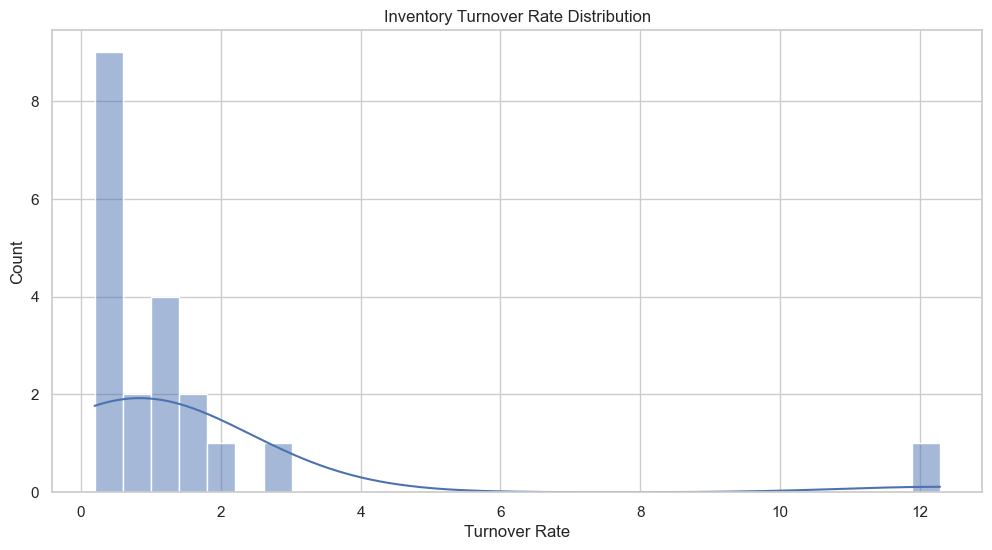

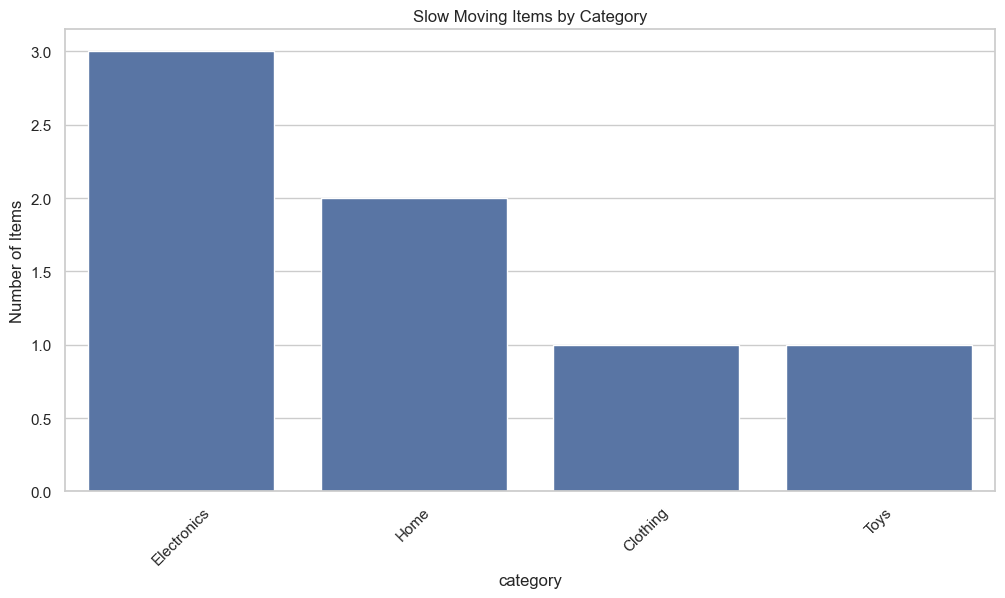

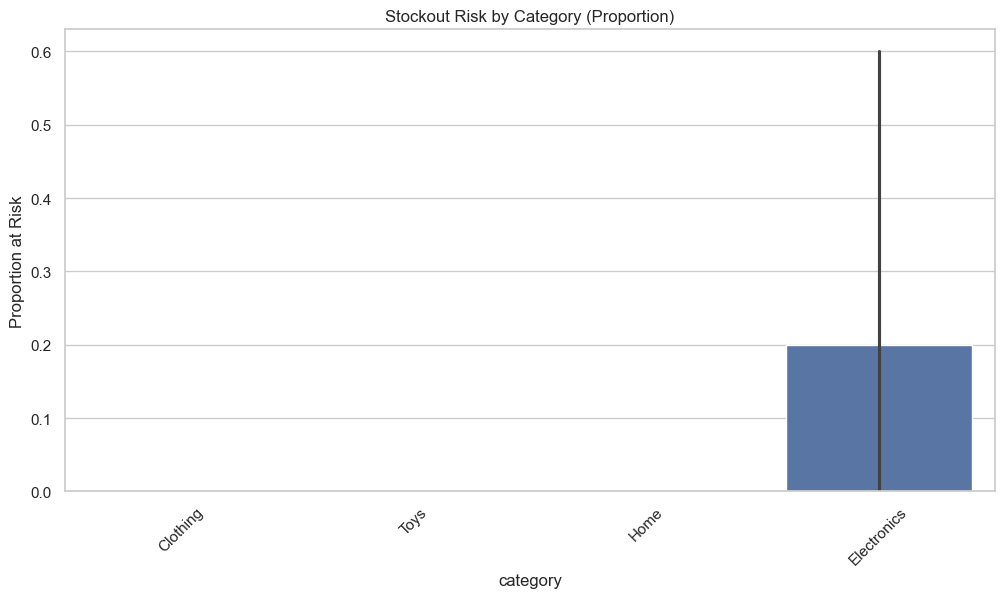

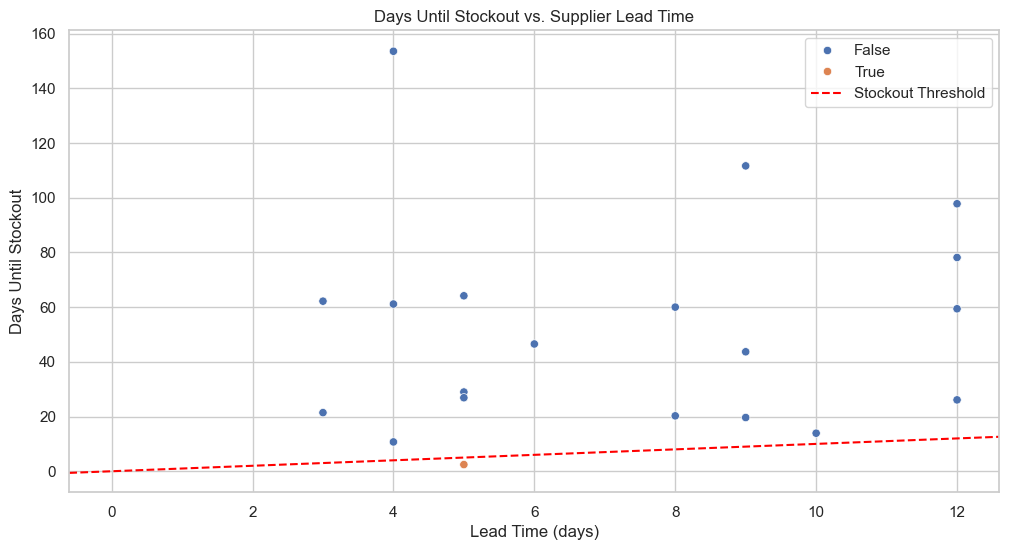

{'inventory_turnover':    product_id  inventory_turnover
0        P001            1.481481
1        P002            0.505155
2        P003            0.490798
3        P004            0.268750
4        P005            1.400000
5        P006            0.500000
6        P007           12.285714
7        P008            1.150000
8        P009            0.644860
9        P010            0.686957
10       P011            0.482517
11       P012            0.383929
12       P013            0.195402
13       P014            0.467742
14       P015            1.035714
15       P016            1.527778
16       P017            0.306818
17       P018            2.156250
18       P019            1.116279
19       P020            2.800000, 'slow_moving_items':    product_id     category  stock_level          last_restock_date  sales_30d  \
2        P003     Clothing          163 2025-05-03 18:12:42.008470         80   
3        P004         Toys          160 2025-04-08 18:12:42.008470         43  

In [7]:
#test

result = analyze_inventory(df, slow_turnover_threshold=0.5)
print(result)

Prompt 2:

I have issues with Python code that I am working with. Our marketing team shows  that the user engagement metrics is showing impossible results (bounce rates over 100%, negative session times. We also need data validation on the logs dataframe, proper time calculations and to create summary visualizations :

def analyze_user_engagement(logs_df):
    metrics = {

        'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(
            lambda x: x == 1).mean(),
        'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
        'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
    }
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',
        'duration': 'mean',
        'page_views': 'sum'
    })
    
    return metrics, device_metrics

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_user_engagement(logs_df):
    # --- Step 1: Data Validation ---
    logs_df = logs_df.copy()

    # Drop rows with missing session_id or duration or page_views
    logs_df.dropna(subset=['session_id', 'duration', 'page_views'], inplace=True)

    # Remove invalid values
    logs_df = logs_df[(logs_df['duration'] >= 0) & (logs_df['page_views'] >= 0)]

    # --- Step 2: Compute Aggregated Session-Level Metrics ---
    session_df = logs_df.groupby('session_id').agg({
        'duration': 'sum',
        'page_views': 'sum'
    })

    # Bounce rate: % of sessions with only 1 page view
    num_bounces = (session_df['page_views'] == 1).sum()
    total_sessions = session_df.shape[0]
    bounce_rate = num_bounces / total_sessions if total_sessions > 0 else np.nan

    # Average session time and pages per session
    avg_session_time = session_df['duration'].mean()
    pages_per_session = session_df['page_views'].mean()

    metrics = {
        'bounce_rate': round(bounce_rate * 100, 2),  # as percentage
        'avg_session_time': round(avg_session_time, 2),
        'pages_per_session': round(pages_per_session, 2)
    }

    # --- Step 3: Device-level metrics ---
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': pd.Series.nunique,  # number of unique sessions
        'duration': 'mean',
        'page_views': 'sum'
    }).rename(columns={'session_id': 'unique_sessions'})

    # --- Step 4: Visualizations ---

    sns.set(style="whitegrid")
    plt.rcParams['figure.figsize'] = (12, 5)

    # Session Duration Distribution
    plt.figure()
    sns.histplot(session_df['duration'], bins=30, kde=True)
    plt.title('Distribution of Session Durations')
    plt.xlabel('Duration (seconds)')
    plt.show()

    # Page Views per Session
    plt.figure()
    sns.histplot(session_df['page_views'], bins=30, kde=False)
    plt.title('Pages per Session Distribution')
    plt.xlabel('Page Views')
    plt.show()

    # Device Comparison
    plt.figure()
    sns.barplot(data=device_metrics.reset_index(), x='device_type', y='unique_sessions')
    plt.title('Sessions by Device Type')
    plt.ylabel('Unique Sessions')
    plt.show()

    return metrics, device_metrics

Follow up:

please provide the sample with invalid entries to test validation

In [13]:
import pandas as pd
import numpy as np

# Sample data with intentional errors
logs_data = {
    'session_id': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', None],
    'page_views': [1, 3, 2, -1, 0, 1, 5, 2],           # -1 and 0 are edge cases
    'duration': [30, 120, -10, 60, 0, 45, 300, np.nan],  # -10 and NaN are invalid
    'device_type': ['mobile', 'desktop', 'mobile', 'tablet', 'mobile', 'desktop', 'tablet', 'mobile']
}

logs_df = pd.DataFrame(logs_data)

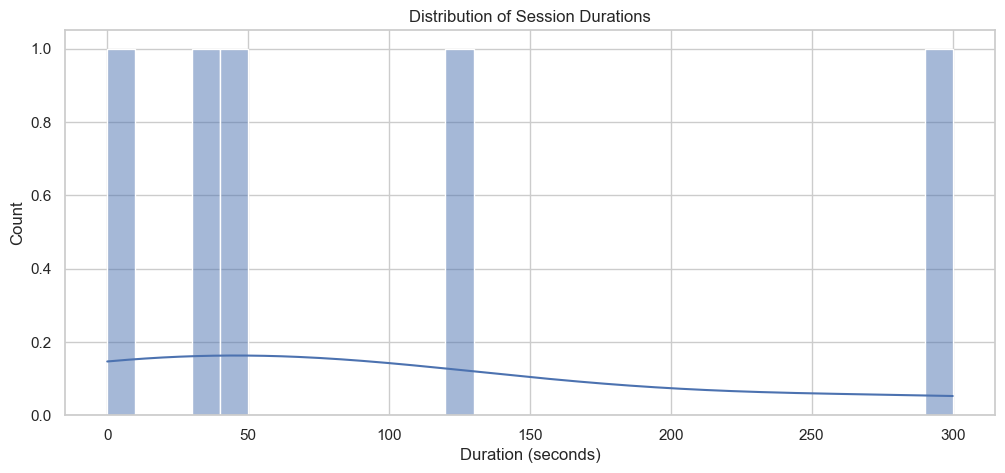

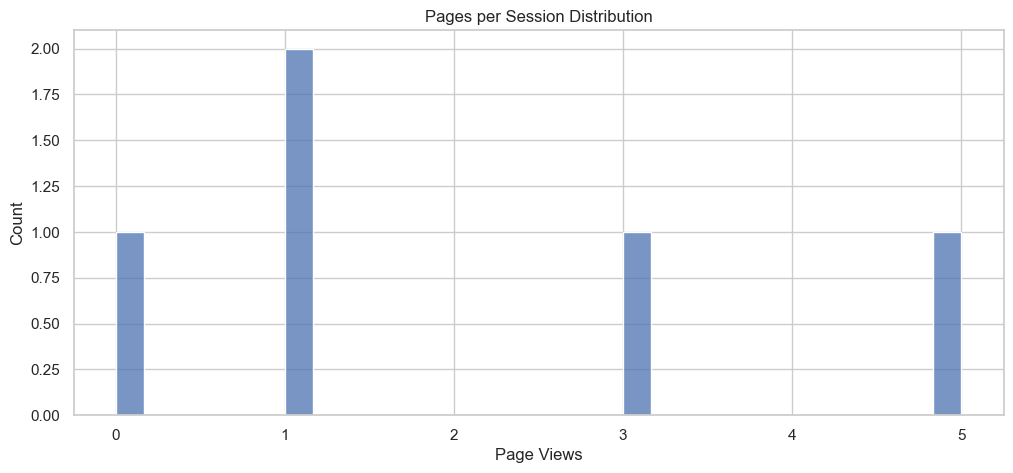

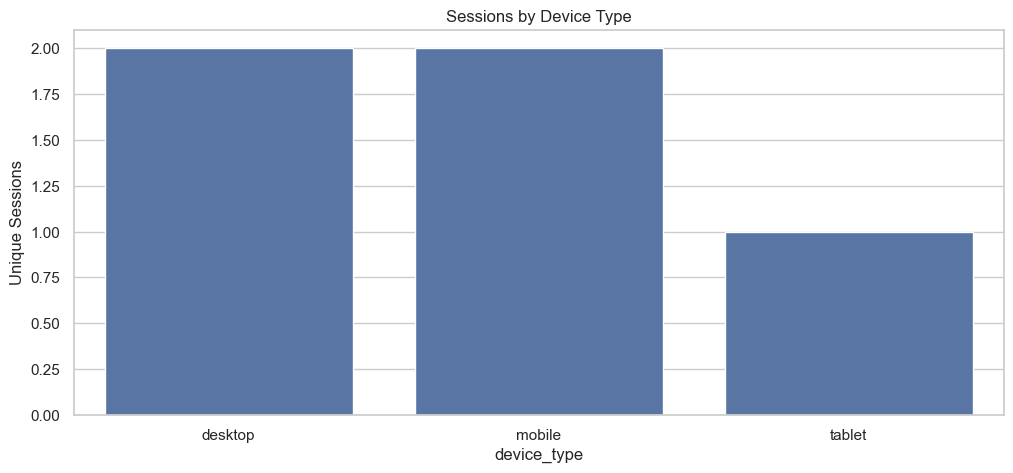

{'bounce_rate': 40.0, 'avg_session_time': 99.0, 'pages_per_session': 2.0}
             unique_sessions  duration  page_views
device_type                                       
desktop                    2      82.5           4
mobile                     2      15.0           1
tablet                     1     300.0           5


In [17]:
metric, d_metric = analyze_user_engagement(logs_df)
print(metric)
print(d_metric)

Prompt 3:

Our product team needs to segment customers based on their purchasing behavior. Using python and sqlite3, we are working with the following database schema. I need an SQL query that identifies active users (last 30 days), filters by the 20% of customers by spending, and user preference trends for the identified customers

In [20]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta

# Connect to the database
conn = sqlite3.connect("your_database.db")

# Step 1: Get spend per customer in last 30 days
query = """
    SELECT 
        customer_id,
        SUM(total_amount) AS total_spent
    FROM orders
    WHERE order_date >= DATE('now', '-30 day')
    GROUP BY customer_id
"""
recent_spend_df = pd.read_sql_query(query, conn)

# Step 2: Calculate 80th percentile
cutoff = recent_spend_df['total_spent'].quantile(0.80)

# Step 3: Get top 20% spender IDs
top_customers = recent_spend_df[recent_spend_df['total_spent'] >= cutoff]
top_ids = tuple(top_customers['customer_id'].values)

# Step 4: Get category preferences of top customers
placeholders = ",".join("?" * len(top_ids))
preference_query = f"""
    SELECT 
        o.customer_id,
        pr.category,
        COUNT(*) AS items_bought,
        SUM(oi.quantity) AS total_units,
        ROUND(SUM(oi.quantity * oi.price_per_unit), 2) AS total_spent
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products pr ON oi.product_id = pr.product_id
    WHERE o.order_date >= DATE('now', '-30 day') AND o.customer_id IN ({placeholders})
    GROUP BY o.customer_id, pr.category
    ORDER BY o.customer_id, total_spent DESC;
"""

preference_df = pd.read_sql_query(preference_query, conn, params=top_ids)
conn.close()

print(preference_df.head())


DatabaseError: Execution failed on sql '
    SELECT 
        customer_id,
        SUM(total_amount) AS total_spent
    FROM orders
    WHERE order_date >= DATE('now', '-30 day')
    GROUP BY customer_id
': no such table: orders

Follow up:

Our product team needs to segment customers based on their purchasing behavior. Using python and sqlite3, we are working with the following database schema. I need an SQL query that identifies active users (last 30 days), filters by the 20% of customers by spending, and user preference trends for the identified customers.
Database Schema:

user_activity
 user_id
last_login_date
feature_usage_count
account_type
transactions
 transaction_id
user_id
transaction_date
amount
platform
user_preferences
 user_id
communication_preference
interface_theme
notification_settings

In [18]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("your_database.db")

active_spend_query = """
    SELECT
        ua.user_id,
        SUM(t.amount) AS total_spent
    FROM user_activity ua
    JOIN transactions t ON ua.user_id = t.user_id
    WHERE ua.last_login_date >= DATE('now', '-30 day')
    GROUP BY ua.user_id
"""
active_spenders_df = pd.read_sql_query(active_spend_query, conn)

# Calculate 80th percentile threshold
spend_threshold = active_spenders_df['total_spent'].quantile(0.80)

# Filter top 20% spenders
top_users = active_spenders_df[active_spenders_df['total_spent'] >= spend_threshold]
top_user_ids = tuple(top_users['user_id'].values)

# Create placeholders for SQLite query
placeholders = ",".join("?" * len(top_user_ids))

# Get preference trends
preference_query = f"""
    SELECT 
        communication_preference,
        interface_theme,
        notification_settings,
        COUNT(*) AS user_count
    FROM user_preferences
    WHERE user_id IN ({placeholders})
    GROUP BY communication_preference, interface_theme, notification_settings
    ORDER BY user_count DESC
"""
preferences_df = pd.read_sql_query(preference_query, conn, params=top_user_ids)

DatabaseError: Execution failed on sql '
    SELECT
        ua.user_id,
        SUM(t.amount) AS total_spent
    FROM user_activity ua
    JOIN transactions t ON ua.user_id = t.user_id
    WHERE ua.last_login_date >= DATE('now', '-30 day')
    GROUP BY ua.user_id
': no such table: user_activity

Follow up:

is there any way to make a sample file for testing

In [21]:
import sqlite3
import random
import pandas as pd
from datetime import datetime, timedelta

# Function to generate random data for testing
def generate_sample_data():
    # Connect to SQLite (this creates the database file)
    conn = sqlite3.connect('sample_database.db')
    cursor = conn.cursor()

    # Create tables
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS user_activity (
        user_id INTEGER PRIMARY KEY,
        last_login_date DATE,
        feature_usage_count INTEGER,
        account_type TEXT
    )''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS transactions (
        transaction_id INTEGER PRIMARY KEY,
        user_id INTEGER,
        transaction_date DATE,
        amount REAL,
        platform TEXT,
        FOREIGN KEY(user_id) REFERENCES user_activity(user_id)
    )''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS user_preferences (
        user_id INTEGER,
        communication_preference TEXT,
        interface_theme TEXT,
        notification_settings TEXT,
        FOREIGN KEY(user_id) REFERENCES user_activity(user_id)
    )''')

    # Insert mock data into user_activity
    users = []
    for user_id in range(1, 21):
        last_login_date = datetime.now() - timedelta(days=random.randint(1, 40))
        feature_usage_count = random.randint(1, 100)
        account_type = random.choice(['free', 'premium'])
        users.append((user_id, last_login_date.strftime('%Y-%m-%d'), feature_usage_count, account_type))

    cursor.executemany('''
    INSERT INTO user_activity (user_id, last_login_date, feature_usage_count, account_type)
    VALUES (?, ?, ?, ?)
    ''', users)

    # Insert mock data into transactions
    transactions = []
    for transaction_id in range(1, 101):  # 100 transactions for testing
        user_id = random.choice(range(1, 21))  # Random user_id between 1 and 20
        transaction_date = datetime.now() - timedelta(days=random.randint(1, 30))
        amount = round(random.uniform(10.0, 500.0), 2)  # Random amount between $10 and $500
        platform = random.choice(['web', 'mobile'])
        transactions.append((transaction_id, user_id, transaction_date.strftime('%Y-%m-%d'), amount, platform))

    cursor.executemany('''
    INSERT INTO transactions (transaction_id, user_id, transaction_date, amount, platform)
    VALUES (?, ?, ?, ?, ?)
    ''', transactions)

    # Insert mock data into user_preferences
    preferences = []
    for user_id in range(1, 21):
        communication_preference = random.choice(['email', 'sms', 'push'])
        interface_theme = random.choice(['light', 'dark'])
        notification_settings = random.choice(['on', 'off'])
        preferences.append((user_id, communication_preference, interface_theme, notification_settings))

    cursor.executemany('''
    INSERT INTO user_preferences (user_id, communication_preference, interface_theme, notification_settings)
    VALUES (?, ?, ?, ?)
    ''', preferences)

    # Commit changes and close the connection
    conn.commit()
    conn.close()

# Generate the sample data and database
generate_sample_data()

print("Sample database 'sample_database.db' created successfully.")


Sample database 'sample_database.db' created successfully.


In [22]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('sample_database.db')

active_spend_query = """
    SELECT
        ua.user_id,
        SUM(t.amount) AS total_spent
    FROM user_activity ua
    JOIN transactions t ON ua.user_id = t.user_id
    WHERE ua.last_login_date >= DATE('now', '-30 day')
    GROUP BY ua.user_id
"""
active_spenders_df = pd.read_sql_query(active_spend_query, conn)

# Calculate 80th percentile threshold
spend_threshold = active_spenders_df['total_spent'].quantile(0.80)

# Filter top 20% spenders
top_users = active_spenders_df[active_spenders_df['total_spent'] >= spend_threshold]
top_user_ids = tuple(top_users['user_id'].values)

# Create placeholders for SQLite query
placeholders = ",".join("?" * len(top_user_ids))

# Get preference trends
preference_query = f"""
    SELECT 
        communication_preference,
        interface_theme,
        notification_settings,
        COUNT(*) AS user_count
    FROM user_preferences
    WHERE user_id IN ({placeholders})
    GROUP BY communication_preference, interface_theme, notification_settings
    ORDER BY user_count DESC
"""
preferences_df = pd.read_sql_query(preference_query, conn, params=top_user_ids)

In [24]:
active_spenders_df.head()

,user_id,total_spent
0,3,137.33
1,4,833.58
2,6,1642.62
3,7,1308.04
4,8,1334.49


In [27]:
top_users.head()

,user_id,total_spent
6,11,2111.68
7,12,1766.65
12,19,2209.75


In [28]:
preferences_df.head()

,communication_preference,interface_theme,notification_settings,user_count


Follow up:

separate the three tasks entirely:

Active users (logged in last 30 days)
Filter by high-value customers (top 20% by spending)
User preference trends for the identified customers

In [30]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('sample_database.db')

# SQL query to get users active in the last 30 days
active_users_query = """
    SELECT user_id, last_login_date
    FROM user_activity
    WHERE last_login_date >= DATE('now', '-30 day')
"""

active_users_df = pd.read_sql_query(active_users_query, conn)
print("Active Users:\n", active_users_df.head())

# SQL query to calculate total spending for active users
total_spend_query = """
    SELECT t.user_id, SUM(t.amount) AS total_spent
    FROM transactions t
    JOIN user_activity ua ON t.user_id = ua.user_id
    WHERE ua.last_login_date >= DATE('now', '-30 day')
    GROUP BY t.user_id
"""

# Get total spending for active users
total_spenders_df = pd.read_sql_query(total_spend_query, conn)

# Calculate the 80th percentile for filtering top 20% spenders
spend_threshold = total_spenders_df['total_spent'].quantile(0.80)

# Filter for top 20% spenders
top_spenders_df = total_spenders_df[total_spenders_df['total_spent'] >= spend_threshold]
print("Top 20% Spenders:\n", top_spenders_df.head())

# Create a tuple of top spender user_ids for the query
top_user_ids = tuple(top_spenders_df['user_id'].values)

# Create placeholders for SQLite query
placeholders = ",".join("?" * len(top_user_ids))

# SQL query to get user preferences for top 20% spenders
preference_query = f"""
    SELECT 
        up.communication_preference,
        up.interface_theme,
        up.notification_settings,
        COUNT(*) AS user_count
    FROM user_preferences up
    WHERE up.user_id IN ({placeholders})
    GROUP BY up.communication_preference, up.interface_theme, up.notification_settings
    ORDER BY user_count DESC
"""

# Get preference trends for the top spenders
preferences_df = pd.read_sql_query(preference_query, conn, params=top_user_ids)
print("User Preference Trends:\n", preferences_df.head())

Active Users:
    user_id last_login_date
0        3      2025-05-07
1        4      2025-05-03
2        6      2025-04-20
3        7      2025-04-10
4        8      2025-04-26
Top 20% Spenders:
     user_id  total_spent
6        11      2111.68
7        12      1766.65
12       19      2209.75
User Preference Trends:
 Empty DataFrame
Columns: [communication_preference, interface_theme, notification_settings, user_count]
Index: []


Follow up:

for top spend query, we are still looking at only active customers. the top spenders should look at all users not just active

In [51]:
# SQL query to get active users who have logged in within the last 30 days
active_users_query = """
    SELECT user_id, last_login_date
    FROM user_activity
    WHERE last_login_date >= DATE('now', '-30 day')
"""

active_users_df = pd.read_sql_query(active_users_query, conn)
print("Active Users:\n", active_users_df.head())


# SQL query to calculate total spending across all users (without restricting to active users)
total_spend_query_all_users = """
    SELECT t.user_id, SUM(t.amount) AS total_spent
    FROM transactions t
    GROUP BY t.user_id
"""

# Get total spending for all users
total_spenders_df = pd.read_sql_query(total_spend_query_all_users, conn)
top_spenders_df.loc[:, 'user_id'] = top_spenders_df['user_id'].astype(int)

# Calculate the 80th percentile for filtering top 20% spenders
spend_threshold = total_spenders_df['total_spent'].quantile(0.80)

# Filter for top 20% spenders
top_spenders_df = total_spenders_df[total_spenders_df['total_spent'] >= spend_threshold]
print("Top 20% Spenders (Across All Users):\n", top_spenders_df.head())


# Create a tuple of top spender user_ids for the query
top_user_ids = tuple(top_spenders_df['user_id'].values)

# Create placeholders for SQLite query
placeholders = ",".join("?" * len(top_user_ids))

# SQL query to get user preferences for the top 20% spenders (across all users)
preference_query = f"""
    SELECT 
        up.communication_preference,
        up.interface_theme,
        up.notification_settings,
        COUNT(*) AS user_count
    FROM user_preferences up
    WHERE up.user_id IN ({placeholders})
    GROUP BY up.communication_preference, up.interface_theme, up.notification_settings
    ORDER BY user_count DESC
"""

# Get preference trends for the top spenders
preferences_df = pd.read_sql_query(preference_query, conn, params=top_user_ids)
print("User Preference Trends for Top Spend Users:\n", preferences_df.head())


Active Users:
    user_id last_login_date
0        3      2025-05-07
1        4      2025-05-03
2        6      2025-04-20
3        7      2025-04-10
4        8      2025-04-26
Top 20% Spenders (Across All Users):
     user_id  total_spent
10       11      2111.68
11       12      1766.65
16       17      1808.94
18       19      2209.75
User Preference Trends for Top Spend Users:
 Empty DataFrame
Columns: [communication_preference, interface_theme, notification_settings, user_count]
Index: []


My testing:

In [43]:
preference_test = f"""
    SELECT 
        up.user_id,
        up.communication_preference,
        up.interface_theme,
        up.notification_settings
    FROM user_preferences up
"""

# Get preference trends for the top spenders
test_df = pd.read_sql_query(preference_test, conn)
test_df.head(22)

,user_id,communication_preference,interface_theme,notification_settings
0,1,sms,dark,on
1,2,sms,dark,on
2,3,push,light,on
3,4,push,light,on
4,5,push,light,off
5,6,push,dark,off
6,7,push,light,off
7,8,push,dark,on
8,9,push,light,off
9,10,sms,dark,off


In [37]:
placeholders

'?,?,?,?'

Prompt:

preferences_df is still empty

In [46]:
# Check a sample of top spender user_ids
sample_user_ids = top_spenders_df['user_id'].head(5).tolist()
print("Sample user IDs:", sample_user_ids)

# SQL query to check if there are any preferences for a small sample of user_ids
sample_preference_query = """
    SELECT * 
    FROM user_preferences 
    WHERE user_id IN ({})
""".format(','.join('?' for _ in sample_user_ids))

# Fetch preferences for the sample user_ids
sample_preferences_df = pd.read_sql_query(sample_preference_query, conn, params=sample_user_ids)
print("Sample User Preferences:\n", sample_preferences_df)


Sample user IDs: [11, 12, 17, 19]
Sample User Preferences:
    user_id communication_preference interface_theme notification_settings
0       11                     push           light                   off
1       12                      sms            dark                    on
2       17                      sms           light                   off
3       19                    email            dark                    on


In [47]:
# Identify top spenders with no preferences
top_spender_ids = top_spenders_df['user_id'].tolist()
missing_preferences_ids = []

for user_id in top_spender_ids:
    query = "SELECT 1 FROM user_preferences WHERE user_id = ? LIMIT 1"
    result = pd.read_sql_query(query, conn, params=(user_id,))
    if result.empty:
        missing_preferences_ids.append(user_id)

print(f"Missing preferences for the following users: {missing_preferences_ids}")


Missing preferences for the following users: []


In [48]:
# Check user preferences for a smaller set of users
preference_query_debug = """
    SELECT 
        up.user_id,
        up.communication_preference,
        up.interface_theme,
        up.notification_settings
    FROM user_preferences up
    LIMIT 10
"""

# Run the query and check a few rows
preferences_debug_df = pd.read_sql_query(preference_query_debug, conn)
print("Sample Preferences Data:\n", preferences_debug_df)


Sample Preferences Data:
    user_id communication_preference interface_theme notification_settings
0        1                      sms            dark                    on
1        2                      sms            dark                    on
2        3                     push           light                    on
3        4                     push           light                    on
4        5                     push           light                   off
5        6                     push            dark                   off
6        7                     push           light                   off
7        8                     push            dark                    on
8        9                     push           light                   off
9       10                      sms            dark                   off


In [52]:
try:
    preferences_df = pd.read_sql_query(preference_query, conn, params=top_user_ids)
    print("User Preference Trends:\n", preferences_df.head())
except Exception as e:
    print("Error executing query:", e)


User Preference Trends:
 Empty DataFrame
Columns: [communication_preference, interface_theme, notification_settings, user_count]
Index: []


In [53]:
# Print the first few user_ids from the top spenders DataFrame to ensure they are valid
print("Top Spenders (User IDs):", top_spenders_df['user_id'].head())


Top Spenders (User IDs): 10    11
11    12
16    17
18    19
Name: user_id, dtype: int64


In [54]:
# Check if the top spender user_ids are in the user_preferences table
user_ids = tuple(top_spenders_df['user_id'].head(10))  # Get a subset for testing
query = """
    SELECT user_id
    FROM user_preferences
    WHERE user_id IN ({})
""".format(','.join('?' * len(user_ids)))

# Fetch data to see if those user_ids exist in user_preferences
test_preference_df = pd.read_sql_query(query, conn, params=user_ids)
print("User Preferences for Top Spenders (Subset):\n", test_preference_df)


User Preferences for Top Spenders (Subset):
    user_id
0       11
1       12
2       17
3       19


In [55]:
# Run a simplified query to fetch preferences for a few top spenders
top_spender_ids = top_spenders_df['user_id'].head(5).tolist()  # Get a small subset
preference_query_simple = """
    SELECT user_id, communication_preference, interface_theme, notification_settings
    FROM user_preferences
    WHERE user_id IN ({})
""".format(','.join('?' * len(top_spender_ids)))

# Execute the query and check for results
preferences_simple_df = pd.read_sql_query(preference_query_simple, conn, params=top_spender_ids)
print("Simplified User Preferences for Top Spenders:\n", preferences_simple_df)


Simplified User Preferences for Top Spenders:
    user_id communication_preference interface_theme notification_settings
0       11                     push           light                   off
1       12                      sms            dark                    on
2       17                      sms           light                   off
3       19                    email            dark                    on
